In [18]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [19]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [20]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [21]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [22]:
def all_plotter(original_test, original_sparsity, original_selectivity, conv_test, conv_sparsity, conv_selectivity, location='best'):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.plot(np.linspace(0.0, 5.0, num=5), original_test[:5], label='original_test', c='royalblue')
    ax.plot(np.linspace(0.0, 5.0, num=5), original_sparsity[:5], label='original_sparsity', c='cornflowerblue')
    ax.plot(np.linspace(0.0, 5.0, num=5), original_selectivity[:5], label='original_selectivity', c='lightsteelblue')
    
    ax.plot(np.linspace(0.0, 5.0, num=5), conv_test, label='conv_test', c='indigo')
    ax.plot(np.linspace(0.0, 5.0, num=5), conv_sparsity, label='conv_sparsity', c='darkorchid')
    ax.plot(np.linspace(0.0, 5.0, num=5), conv_selectivity, label='conv_selectivity', c='violet')
    
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    plt.show()

# Graph format

In [23]:
def plotter(optimizer_name, flag=False):
    ori_ta = test_val_extractor(f"original_selectivity_{optimizer_name}.txt")
    ori_sparsity = sparsity_val_extractor(f"original_sparsity_{optimizer_name}.txt")
    ori_selectivity_avg, ori_selectivity_std = selectivity_val_extractor(f"original_selectivity_{optimizer_name}.txt")

    conv_ta = test_val_extractor(f"conv_selectivity_{optimizer_name}.txt")
    conv_sparsity = sparsity_val_extractor(f"conv_sparsity_{optimizer_name}.txt")
    conv_selectivity_avg, conv_selectivity_std = selectivity_val_extractor(f"conv_selectivity_{optimizer_name}.txt")
    
    if flag==False:
        all_plotter(ori_ta, ori_sparsity, ori_selectivity_avg, conv_ta, conv_sparsity, conv_selectivity_avg)

    if flag==True:
        return ori_ta, ori_sparsity, ori_selectivity_avg, ori_selectivity_std, conv_ta, conv_sparsity, conv_selectivity_avg, conv_selectivity_std

In [24]:
sgd_test_ori,      sgd_spar_ori,      sgd_selec_ori_avg,      sgd_selec_ori_std,      sgd_test_conv,      sgd_spar_conv,      sgd_selec_conv_avg,      sgd_selec_conv_std      = plotter('SGD', flag=True)
Adadelta_test_ori, Adadelta_spar_ori, Adadelta_selec_ori_avg, Adadelta_selec_ori_std, Adadelta_test_conv, Adadelta_spar_conv, Adadelta_selec_conv_avg, Adadelta_selec_conv_std = plotter('Adadelta', flag=True)
# Adagrad_test_ori,  Adagrad_spar_ori,  Adagrad_selec_ori_avg,  Adagrad_selec_ori_std,  Adagrad_test_conv,  Adagrad_spar_conv,  Adagrad_selec_conv_avg,  Adagrad_selec_conv_std  = plotter('Adagrad', flag=True)
Adam_test_ori,     Adam_spar_ori,     Adam_selec_ori_avg,     Adam_selec_ori_std,     Adam_test_conv,     Adam_spar_conv,     Adam_selec_conv_avg,     Adam_selec_conv_std     = plotter('Adam', flag=True)

# Subplots

In [25]:
def subplots(ori_sgd, ori_adadelta, ori_adam,
             conv_sgd, conv_adadelta, conv_adam):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
    
    # ax1 = testing 
    ax1.plot(np.linspace(0, 5, 5), ori_sgd, label='SGD', c='red')
    ax1.plot(np.linspace(0, 5, 5), ori_adadelta, label='Adadelta', c='blue')
    ax1.plot(np.linspace(0, 5, 5), ori_adam, label='Adam', c='violet')
    ax1.set_ylim([-0.1,1.1])
    ax1.grid()
    ax1.legend(loc='best')
    
    # ax2 = sparsity 
    ax2.plot(np.linspace(0, 5, 5), conv_sgd, label='conv SGD', c='red')
    ax2.plot(np.linspace(0, 5, 5), conv_adadelta, label='conv Adadelta', c='blue')
    ax2.plot(np.linspace(0, 5, 5), conv_adam, label='conv Adam', c='violet')
    ax2.set_ylim([-0.1,1.1])
    ax2.grid()
    ax2.legend(loc='best')
    
    plt.show()

In [26]:
def compare(optimizer_name, flag=True):
    ori_ta, ori_sparsity, ori_selectivity_avg, ori_selectivity_std, conv_ta, conv_sparsity, conv_selectivity_avg, conv_selectivity_std = plotter(optimizer_name, flag=True)
    print(f'\n==============={optimizer_name}===============')
    print(f"{optimizer_name} without conv: Test acc={ori_ta[4]:.3f}, Spar={ori_sparsity[4]:.3f}, Selec avg={ori_selectivity_avg[4]:.3f}, Selec std={ori_selectivity_std[4]:.3f}")
    print(f"{optimizer_name} conv: Test acc={conv_ta[4]:.3f}, Spar={conv_sparsity[4]:.3f}, Selec avg={conv_selectivity_avg[4]:.3f}, Selec std={conv_selectivity_std[4]:.3f}")
    print()
    print("test deviation: conv - no_conv(original):", conv_ta[4] - ori_ta[4])
    print("sparsity deviation: conv - no_conv(original):", conv_sparsity[4] - ori_sparsity[4])
    print("selectivity deviation: conv - no_conv(original):", conv_selectivity_avg[4] - ori_selectivity_avg[4])
    print()
    print("test % difference: conv / no_conv(original):", (conv_ta[4] / ori_ta[4]) * 100)
    print("sparsity % difference: conv / no_conv(original):", (conv_sparsity[4] / ori_sparsity[4]) * 100)
    print("selectivity % difference: conv / no_conv(original):", (conv_selectivity_avg[4] / ori_selectivity_avg[4]) * 100)

In [27]:
# 30 epoch 
# notice that total epoch of original and conv is different 
print("Test accuracy / Sparsity / Selectivity on last epoch(30)\n")

compare('SGD')
compare('Adadelta')
compare('Adam')

Test accuracy / Sparsity / Selectivity on last epoch(30)


===============SGD===============
SGD without conv: Test acc=0.930, Spar=0.123, Selec avg=0.257, Selec std=0.114
SGD conv: Test acc=0.984, Spar=0.347, Selec avg=0.478, Selec std=0.183

test deviation: conv - no_conv(original): 0.05410000000000004
sparsity deviation: conv - no_conv(original): 0.22466343641281128
selectivity deviation: conv - no_conv(original): 0.22131118033488145

test % difference: conv / no_conv(original): 105.81532838869182
sparsity % difference: conv / no_conv(original): 283.37619069975284
selectivity % difference: conv / no_conv(original): 186.11620719913648

===============Adadelta===============
Adadelta without conv: Test acc=0.969, Spar=0.300, Selec avg=0.406, Selec std=0.174
Adadelta conv: Test acc=0.991, Spar=0.339, Selec avg=0.455, Selec std=0.188

test deviation: conv - no_conv(original): 0.02279999999999993
sparsity deviation: conv - no_conv(original): 0.03929373621940613
selectivity deviation: con

# Subplot - test accuracy

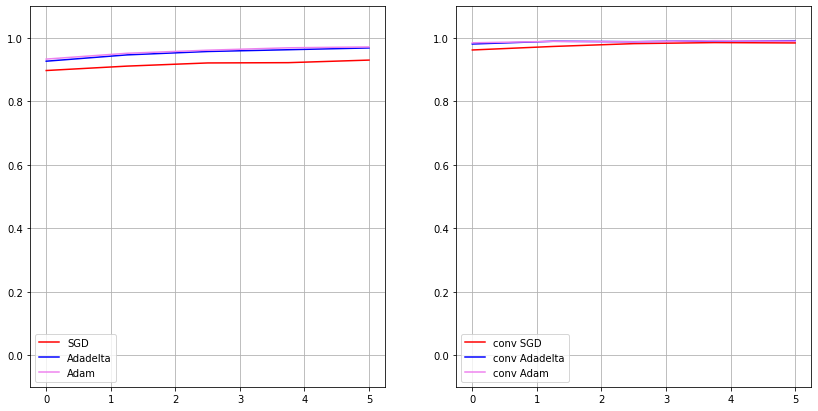

In [28]:
subplots(sgd_test_ori[:5], Adadelta_test_ori[:5], Adam_test_ori[:5], 
         sgd_test_conv[:5], Adadelta_test_conv[:5], Adam_test_conv[:5])

# Subplot - sparsity

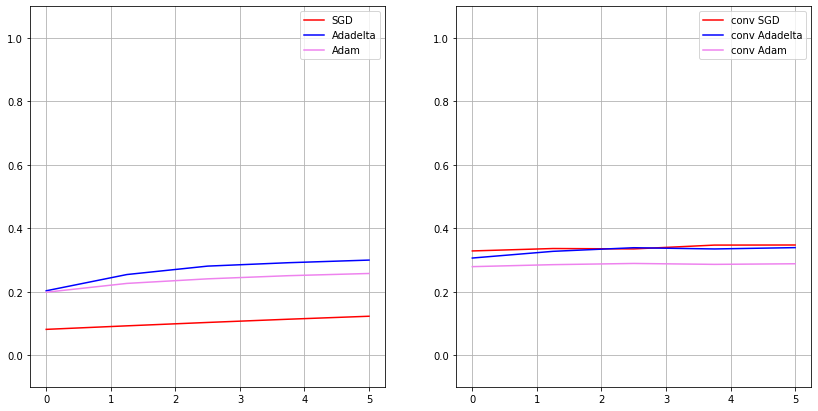

In [29]:
subplots(sgd_spar_ori[:5], Adadelta_spar_ori[:5], Adam_spar_ori[:5], 
         sgd_spar_conv[:5], Adadelta_spar_conv[:5], Adam_spar_conv[:5])

# Subplot - selectivity

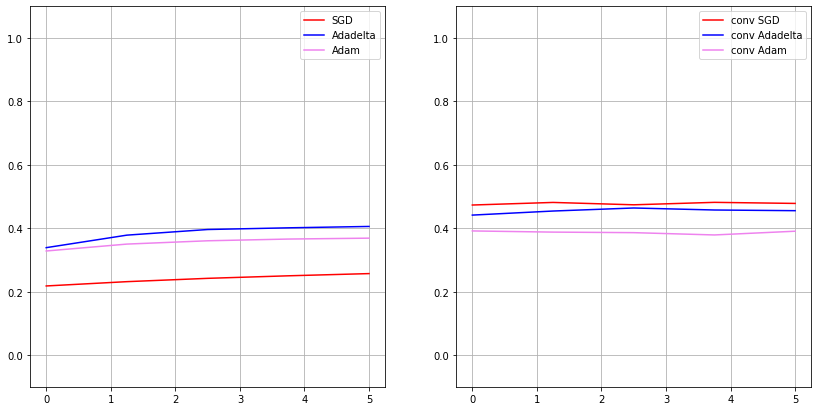

In [30]:
subplots(sgd_selec_ori_avg[:5], Adadelta_selec_ori_avg[:5], Adam_selec_ori_avg[:5], 
         sgd_selec_conv_avg[:5], Adadelta_selec_conv_avg[:5], Adam_selec_conv_avg[:5])

# SGD

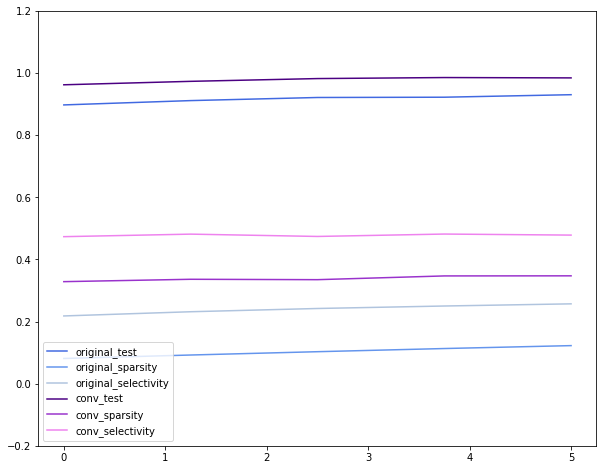

In [14]:
plotter('SGD')

# Adadelta

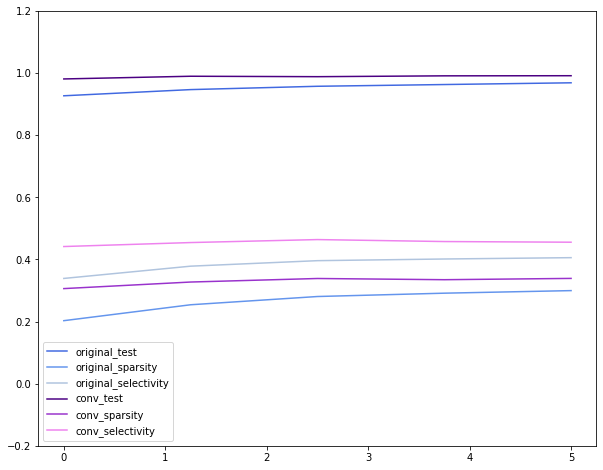

In [15]:
plotter('Adadelta')

# Adagrad

In [16]:
# nan 값이 나옴. 
# ori_ta = test_val_extractor("original_selectivity_Adagrad.txt")
# ori_sparsity = sparsity_val_extractor("original_sparsity_Adagrad.txt")
# ori_selectivity_avg, ori_selectivity_std = selectivity_val_extractor("original_selectivity_Adagrad.txt")

# conv_ta = test_val_extractor("conv_sparsity_Adagrad.txt")
# conv_sparsity = sparsity_val_extractor("conv_sparsity_Adagrad.txt")
# conv_selectivity_avg, conv_selectivity_std = selectivity_val_extractor("conv_selectivity_Adagrad.txt")

# all_plotter(ori_ta, ori_sparsity, ori_selectivity_avg, conv_ta, conv_sparsity, conv_selectivity_avg)

# Adam

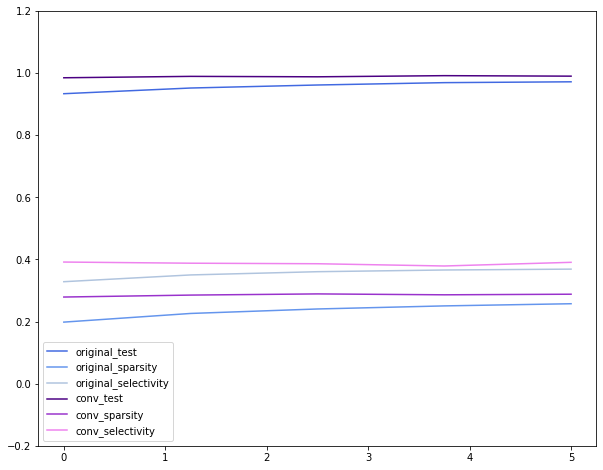

In [17]:
plotter('Adam')